# Import Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Image Dephotobombing Techniques Comparison 📸💣

In this notebook, we'll explore three different techniques for dephotobombing images. The techniques include:

1. **OpenCV**: Using traditional image processing techniques to cut off the mask of the photobombed element from the main picture.
2. **U-Net**: Utilizing a convolutional neural network architecture for semantic segmentation.
3. **DeepFillv2 (Gated CNN's)**: Employing a deep learning model for image inpainting to fill in the photobombed regions.

## 1. OpenCV Technique

For the OpenCV technique, we'll follow a straightforward approach of isolating and removing the photobombed element using image processing operations.

## 2. U-Net Technique

U-Net is a popular architecture for image segmentation tasks. Here, we'll train a U-Net model to segment the photobombed region and then remove it from the main image. Instead of evaluating accuracy, we'll compare the loss metric.

## 3. DeepFillv2 Technique

DeepFillv2, based on Gated Convolutional Neural Networks, is an advanced model for image inpainting. We'll leverage this model to fill in the photobombed areas with contextually appropriate content.

## Comparison Based on Loss Metric

When comparing the U-Net and DeepFillv2 techniques, we'll focus on the loss metric rather than accuracy. Loss provides a more meaningful measure of the performance of these models in this context.

### U-Net Loss

The U-Net model's loss will indicate how effectively it segments the photobombed region.

### DeepFillv2 Loss

Similarly, the loss of the DeepFillv2 model will show its performance in filling in the photobombed areas with realistic content.

By comparing the loss metrics of these techniques, we can determine their effectiveness in dephotobombing images.

Let's proceed with implementing and evaluating these techniques.


# 1. OpenCV-Based Segment Technique

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def de_photobomb(image, ground_truth, binary_mask):
    """
    Function to de-photobomb an image by segmenting and removing the photobombed region.
    
    Args:
    image (np.array): The original image with the photobombed element.
    ground_truth (np.array): The ground truth image without the photobombed element.
    binary_mask (np.array): The binary mask indicating the photobombed region.
    
    Returns:
    np.array: The de-photobombed image.
    """
    
    # Ensure the mask is binary by normalizing its values to 0 and 1
    binary_mask = binary_mask // 255
    
    # Convert the binary mask to a 3-channel mask to match the color channels of the image
    binary_mask_3c = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
    
    # Create an inverse mask to segment the region not affected by the photobomb
    inverse_mask = 1 - binary_mask_3c
    
    # Use the binary mask to segment and remove the photobombed region from the original image
    # Combine the segmented region with the corresponding region from the ground truth
    de_photobombed_image = image * inverse_mask + ground_truth * binary_mask_3c
    
    return de_photobombed_image

# Load the images: the original image, the ground truth image, and the binary mask
image = cv2.imread('/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/dataset/1.jpg')
ground_truth = cv2.imread('/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/groundtruth/1.jpg')
binary_mask = cv2.imread('/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/mask/1.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the input image and the binary mask to match the dimensions of the ground truth image
ground_truth_height, ground_truth_width, ground_truth_channels = ground_truth.shape

# Resize the original image to match the ground truth image dimensions for accurate segmentation
image = cv2.resize(image, (ground_truth_width, ground_truth_height), interpolation=cv2.INTER_AREA)

# Resize the binary mask to match the ground truth dimensions, ensuring proper segmentation
binary_mask = cv2.resize(binary_mask, (ground_truth_width, ground_truth_height), interpolation=cv2.INTER_NEAREST)

# Perform de-photobombing by segmenting and removing the photobombed region
result_image = de_photobomb(image, ground_truth, binary_mask)

# Save the de-photobombed result image
cv2.imwrite('de_photobombed_image.jpg', result_image)


True

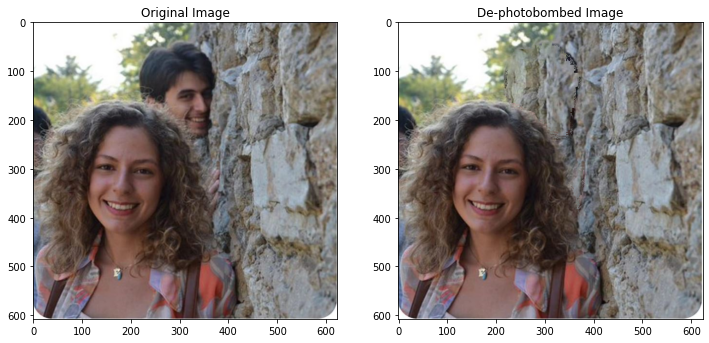

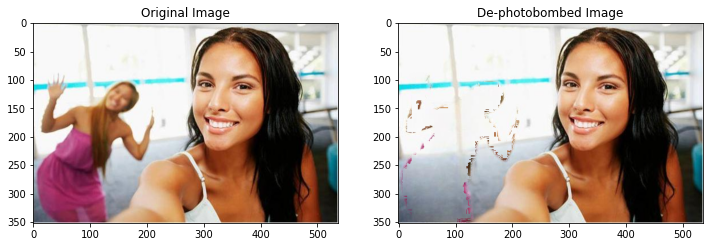

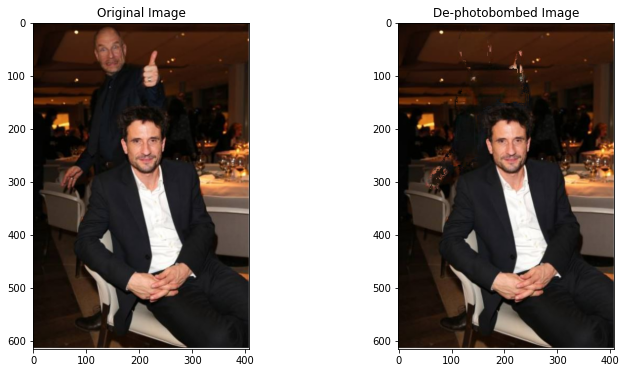

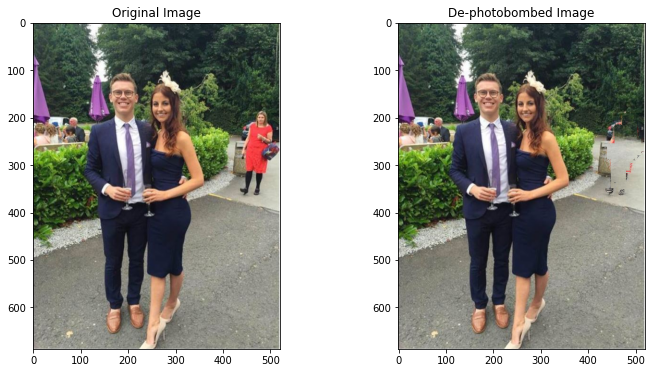

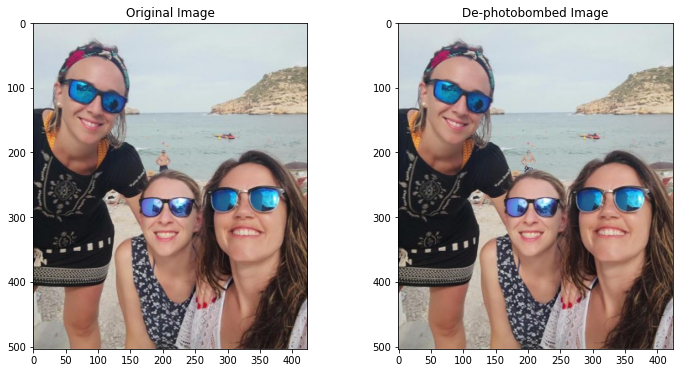

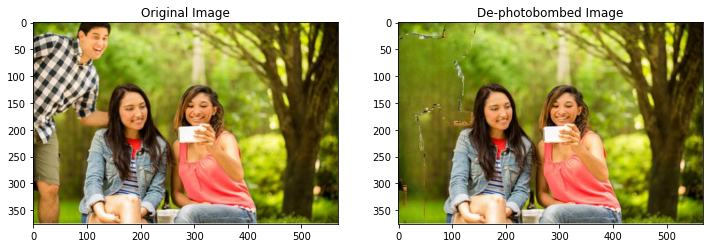

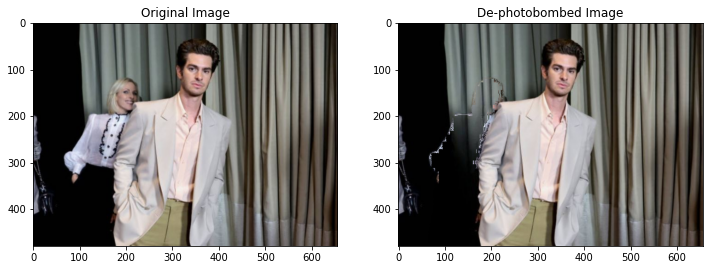

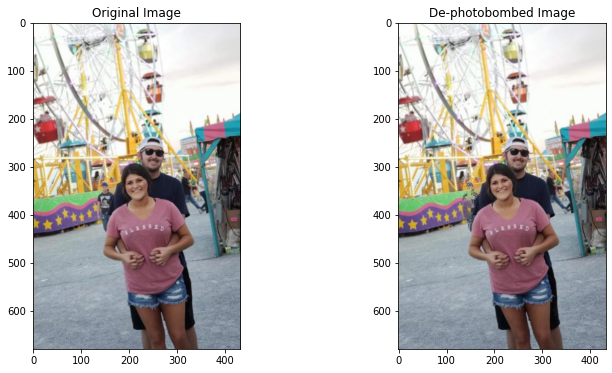

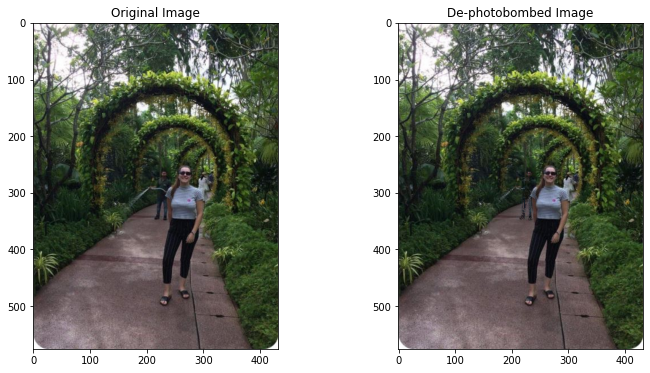

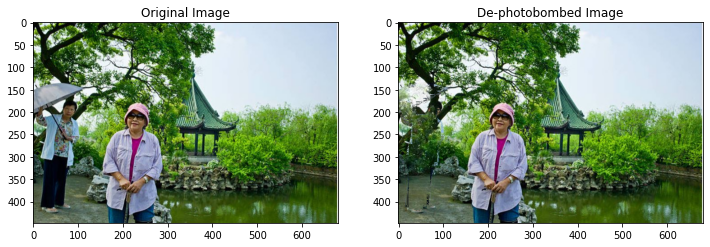

In [3]:
# Load and process the first 10 images
dataset_path = '/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/dataset/'
groundtruth_path = '/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/groundtruth/'
mask_path = '/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/mask/'
num_images = 10

for i in range(1, num_images + 1):
    # Load the images: the original image, the ground truth image, and the binary mask
    image = cv2.imread(f'{dataset_path}{i}.jpg')
    ground_truth = cv2.imread(f'{groundtruth_path}{i}.jpg')
    binary_mask = cv2.imread(f'{mask_path}{i}.jpg', cv2.IMREAD_GRAYSCALE)

    # Resize the input image and the binary mask to match the dimensions of the ground truth image
    ground_truth_height, ground_truth_width, ground_truth_channels = ground_truth.shape

    # Resize the original image to match the ground truth image dimensions for accurate segmentation
    image = cv2.resize(image, (ground_truth_width, ground_truth_height), interpolation=cv2.INTER_AREA)

    # Resize the binary mask to match the ground truth dimensions, ensuring proper segmentation
    binary_mask = cv2.resize(binary_mask, (ground_truth_width, ground_truth_height), interpolation=cv2.INTER_NEAREST)

    # Perform de-photobombing by segmenting and removing the photobombed region
    result_image = de_photobomb(image, ground_truth, binary_mask)

    # Plot the original and de-photobombed images side by side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('De-photobombed Image')
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))

    plt.show()

# 2. Using U-Net (Fully Convolutional/Gated NN's)

In [4]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(256, 256, 4)):
    """
    Builds a U-Net model for image segmentation. 

    Args:
    input_size (tuple): Shape of the input image (height, width, channels).

    Returns:
    model (tf.keras.Model): Compiled U-Net model.
    """
    inputs = layers.Input(input_size)

    def conv_block(inputs, filters):
        """
        Convolutional block: Two convolutional layers followed by batch normalization.

        Args:
        inputs (tf.Tensor): Input tensor to the convolutional block.
        filters (int): Number of filters for the convolutional layers.

        Returns:
        x (tf.Tensor): Output tensor of the convolutional block.
        """
        x = layers.Conv2D(filters, 3, activation='relu', padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        return x

    def encoder_block(inputs, filters):
        """
        Encoder block: Convolutional block followed by max pooling.

        Args:
        inputs (tf.Tensor): Input tensor to the encoder block.
        filters (int): Number of filters for the convolutional layers.

        Returns:
        x (tf.Tensor): Output tensor of the convolutional block.
        p (tf.Tensor): Output tensor of the max pooling layer.
        """
        x = conv_block(inputs, filters)
        p = layers.MaxPooling2D((2, 2))(x)
        return x, p

    def decoder_block(inputs, skip_features, filters):
        """
        Decoder block: Transposed convolution followed by concatenation with skip features 
        and a convolutional block.

        Args:
        inputs (tf.Tensor): Input tensor to the decoder block.
        skip_features (tf.Tensor): Skip connection tensor from the encoder block.
        filters (int): Number of filters for the convolutional layers.

        Returns:
        x (tf.Tensor): Output tensor of the decoder block.
        """
        x = layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(inputs)
        x = layers.Concatenate()([x, skip_features])
        x = conv_block(x, filters)
        return x

    # Encoder: Downsampling path
    s1, p1 = encoder_block(inputs, 64)  # First encoder block
    s2, p2 = encoder_block(p1, 128)     # Second encoder block
    s3, p3 = encoder_block(p2, 256)     # Third encoder block
    s4, p4 = encoder_block(p3, 512)     # Fourth encoder block

    # Bottleneck: Bridge between encoder and decoder
    b = conv_block(p4, 1024)  # Bottleneck layer

    # Decoder: Upsampling path
    d1 = decoder_block(b, s4, 512)  # First decoder block
    d2 = decoder_block(d1, s3, 256) # Second decoder block
    d3 = decoder_block(d2, s2, 128) # Third decoder block
    d4 = decoder_block(d3, s1, 64)  # Fourth decoder block

    # Output layer: Final convolutional layer with sigmoid activation
    outputs = layers.Conv2D(3, 1, activation='sigmoid')(d4)
    
    # Create model
    model = models.Model(inputs, outputs, name='U-Net')
    
    return model

# Build the model
model = unet_model()

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       batch_normalization[0][0]        
______________________________________________________________________________________________

In [6]:
def load_images_from_folder(folder, target_size=(256, 256)):
    images = []
    for filename in sorted(glob.glob(os.path.join(folder, '*.*'))):
        img = load_img(filename, target_size=target_size)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)

# Directories containing the images
input_image_dir = '/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/dataset'
target_image_dir = '/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/groundtruth'
mask_image_dir = '/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/mask'

# Load images from directories
input_images = load_images_from_folder(input_image_dir)   # shape: (num_samples, 256, 256, 3)
target_images = load_images_from_folder(target_image_dir) # shape: (num_samples, 256, 256, 3)
mask_images = load_images_from_folder(mask_image_dir)     # shape: (num_samples, 256, 256, 1)

# Ensure masks have the correct shape
if mask_images.shape[-1] != 1:
    mask_images = mask_images[..., :1]  # Use only one channel if masks are multi-channel

# Stack input images with masks as additional channels
input_with_mask = np.concatenate((input_images, mask_images), axis=-1)  # shape: (num_samples, 256, 256, 4)


In [7]:
history = model.fit(input_with_mask, target_images, batch_size=4, epochs=50, validation_split=0.1)


Epoch 1/50
70/70 [==============================] - 22s 166ms/step - loss: 0.0267 - accuracy: 0.5777 - val_loss: 0.1508 - val_accuracy: 0.3913
Epoch 2/50
70/70 [==============================] - 9s 131ms/step - loss: 0.0156 - accuracy: 0.6390 - val_loss: 0.0662 - val_accuracy: 0.5279
Epoch 3/50
70/70 [==============================] - 9s 132ms/step - loss: 0.0135 - accuracy: 0.6601 - val_loss: 0.1102 - val_accuracy: 0.3895
Epoch 4/50
70/70 [==============================] - 9s 131ms/step - loss: 0.0136 - accuracy: 0.6796 - val_loss: 0.0579 - val_accuracy: 0.5500
Epoch 5/50
70/70 [==============================] - 9s 131ms/step - loss: 0.0126 - accuracy: 0.6692 - val_loss: 0.0378 - val_accuracy: 0.6665
Epoch 6/50
70/70 [==============================] - 9s 131ms/step - loss: 0.0100 - accuracy: 0.6909 - val_loss: 0.0204 - val_accuracy: 0.6578
Epoch 7/50
70/70 [==============================] - 9s 131ms/step - loss: 0.0104 - accuracy: 0.6905 - val_loss: 0.0121 - val_accuracy: 0.6200
Epoch

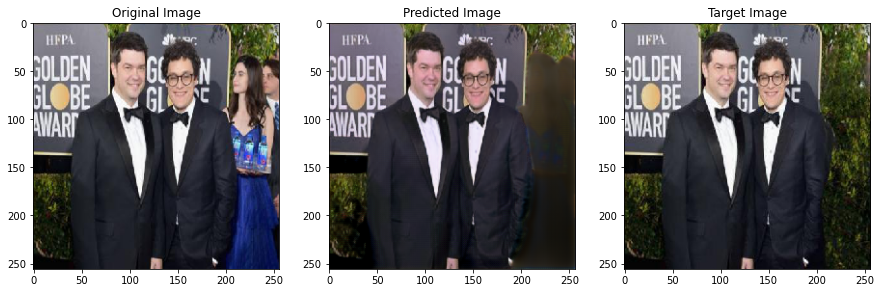

In [10]:
def load_single_image(image_path, target_size=(256, 256)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img) / 255.0
    return img

def predict_single_image(model, input_image_path, mask_image_path):
    input_image = load_single_image(input_image_path)  # shape: (256, 256, 3)
    mask_image = load_single_image(mask_image_path)    # shape: (256, 256, 1)
    
    # Ensure mask has the correct shape
    if mask_image.shape[-1] != 1:
        mask_image = mask_image[..., :1]  # Use only one channel if masks are multi-channel
    
    # Stack input image with mask as additional channel
    input_with_mask = np.concatenate((input_image, mask_image), axis=-1)  # shape: (256, 256, 4)
    input_with_mask = np.expand_dims(input_with_mask, axis=0)  # shape: (1, 256, 256, 4)
    
    # Predict the output
    predicted_image = model.predict(input_with_mask)[0]  # shape: (256, 256, 3)
    
    # Display the results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(input_image)
    axes[0].set_title('Original Image')
    axes[1].imshow(predicted_image)
    axes[1].set_title('Predicted Image')
    axes[2].imshow(load_single_image('/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/groundtruth/115.jpg'))  # Optional: show target image for comparison
    axes[2].set_title('Target Image')
    plt.show()

# Example usage
input_image_path = '/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/dataset/115.jpg'
mask_image_path = '/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/mask/115.jpg'
predict_single_image(model, input_image_path, mask_image_path)
